# Find the most dominant colors in an image

### In this project we will be finding most dominant colors in an image using an unsupervised machine learning technique "K means clustering". we will find only 5 most dominant colors.  
### So let's start

# Import libraries

In [1]:
pip install imutils

  Preparing metadata (setup.py) ... - done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=0b23cec8d42fe024155c975c5dfe1fe2ae197b59a66221d80a0a8261b5dbb18b
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils

### in k means clustering we have to define number of clusters beforehand. we will be choosing k = 5

In [3]:
clusters = 5

# reading the image

### let's read the input image and keep a copy of that aside

In [4]:
img = cv2.imread('../input/color-domination/sample_03.jpg')
original_image = img.copy()
print("Original image shape -->", original_image.shape)

Original image shape --> (2736, 3648, 3)


### resizing the image to get the result fast

In [5]:
img = imutils.resize(img, height = 200)
print("After resizing shgape -->", img.shape)

After resizing shgape --> (200, 266, 3)


# flatening the image. 
### in this step we are flatening the image, keeping all the columns one after another to ultimately make one column. So there will be one column and rows equal to number of pixel of the image

In [6]:
flat_img = np.reshape(img, (-1, 3))
print("After flatening image -->", flat_img.shape)

After flatening image --> (53200, 3)


# making cluster object
### making a k means custering object with n clusters = 5

In [7]:
kmeans = KMeans(n_clusters = clusters, random_state = 0)


# fiting the image
### fit our image in k means clustering algorithm. since the flatened image is working as an array containing the pixel value of the image. these pixel values will be clustered into five groups. these clusters have some centroid which will be the dominant color of the cluster. 

In [8]:
kmeans.fit(flat_img)

KMeans(n_clusters=5, random_state=0)

# Extract colors
### we are extracting the colors in the centroid. we have 5 dominant colors. 
### also we will be calculating the dominance of the colors.
### We are calculating the dominance of each dominant color. np.unique(kmeans.labels_,return_counts=True), this statement will return an array with 2 parts, first part will be the predictions like [2,1,0,1,4,3,2,3,4…], means to which cluster that pixel belongs and the second part will contain the counts like [100,110,310,80,400] where 100 depicts the no. of pixels belonging to class 0 or cluster 0(our indexing starts from 0), and so on, and then we are simply dividing that array by the total no. of pixels, 1000 in the above case, so the percentage array becomes [0.1,0.11,0.31,0.08,0.4]

In [9]:
dominant_colors = np.array(kmeans.cluster_centers_, dtype = 'uint')
percentages = (np.unique(kmeans.labels_, return_counts = True)[1])/flat_img.shape[0]
p_and_c = zip(percentages, dominant_colors)
p_and_c = sorted(p_and_c, reverse = True)


# Plot colors
### we are plotting blocks of dominant colors

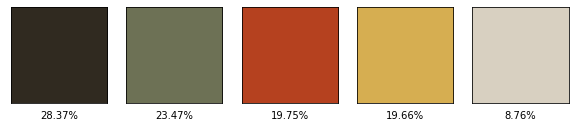

In [10]:
block = np.ones((50, 50, 3), dtype = 'uint')
plt.figure(figsize = (10,8))
for i in range(clusters):
    plt.subplot(1, clusters, i+1)
    block[:] = p_and_c[i][1][::-1]
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(str(round(p_and_c[i][0]*100,2)) + '%')
    

# now we are ploting the proportions of the colors in the image

([], [])

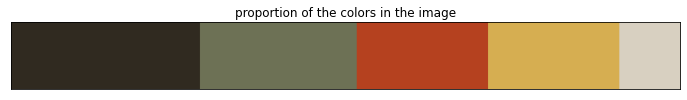

In [11]:
bar = np.ones((50, 500, 3), dtype = 'uint')
plt.figure(figsize = (12, 8))
plt.title("proportion of the colors in the image")
start = 0
i = 1
for p, c in p_and_c:
    end = start + int(p * bar.shape[1])
    if i == clusters:
        bar[:, start:] = c[:: -1]
    else:
        bar[:, start:end] = c[::-1]
    start = end
    i = i + 1
plt.imshow(bar)
plt.xticks([])
plt.yticks([])

# final results

In [12]:
rows = 1000
cols = int((original_image.shape[0]/original_image.shape[1])*rows)
img = cv2.resize(original_image, dsize = (rows, cols), interpolation = cv2.INTER_LINEAR)


In [13]:
copy = img.copy()
cv2.rectangle(copy, (rows//2 - 250, cols // 2 - 90), (rows // 2 + 250, cols //2 + 110), (255, 255, 255), -1)


array([[[ 16,  51,  40],
        [ 13,  50,  36],
        [ 12,  54,  41],
        ...,
        [ 36,  48, 203],
        [ 23,  38, 194],
        [ 14,  28, 181]],

       [[ 16,  55,  42],
        [ 10,  53,  32],
        [  7,  52,  35],
        ...,
        [ 32,  41, 193],
        [ 18,  33, 190],
        [ 15,  28, 183]],

       [[ 20,  58,  42],
        [ 18,  57,  41],
        [ 12,  56,  42],
        ...,
        [ 38,  48, 201],
        [ 40,  48, 202],
        [ 27,  41, 196]],

       ...,

       [[127, 181, 136],
        [127, 182, 134],
        [133, 185, 140],
        ...,
        [ 79, 202, 213],
        [ 92, 204, 217],
        [104, 211, 223]],

       [[129, 184, 136],
        [128, 183, 136],
        [129, 183, 136],
        ...,
        [ 64, 186, 196],
        [ 89, 200, 210],
        [101, 209, 221]],

       [[128, 182, 135],
        [129, 184, 137],
        [129, 183, 136],
        ...,
        [ 78, 194, 205],
        [ 90, 201, 209],
        [ 97, 209, 218]]

### we will be writing the dominant colors in the image itself

In [14]:
final = cv2.addWeighted(img, 0.1, copy, 0.9, 0)
cv2.putText(final, "Most dominant colors in the image", (rows // 2 - 230, cols // 2 - 40), cv2.FONT_HERSHEY_DUPLEX, 0.8, (0,0,0), 1, cv2.LINE_AA)


array([[[ 16,  51,  40],
        [ 13,  50,  36],
        [ 12,  54,  41],
        ...,
        [ 36,  48, 203],
        [ 23,  38, 194],
        [ 14,  28, 181]],

       [[ 16,  55,  42],
        [ 10,  53,  32],
        [  7,  52,  35],
        ...,
        [ 32,  41, 193],
        [ 18,  33, 190],
        [ 15,  28, 183]],

       [[ 20,  58,  42],
        [ 18,  57,  41],
        [ 12,  56,  42],
        ...,
        [ 38,  48, 201],
        [ 40,  48, 202],
        [ 27,  41, 196]],

       ...,

       [[127, 181, 136],
        [127, 182, 134],
        [133, 185, 140],
        ...,
        [ 79, 202, 213],
        [ 92, 204, 217],
        [104, 211, 223]],

       [[129, 184, 136],
        [128, 183, 136],
        [129, 183, 136],
        ...,
        [ 64, 186, 196],
        [ 89, 200, 210],
        [101, 209, 221]],

       [[128, 182, 135],
        [129, 184, 137],
        [129, 183, 136],
        ...,
        [ 78, 194, 205],
        [ 90, 201, 209],
        [ 97, 209, 218]]

In [15]:
start = rows // 2 - 220
for i in range(5):
    end = start + 70
    final[cols // 2: cols//2 + 70, start:end] = p_and_c[i][1]
    cv2.putText(final, str(i+1),(start + 25, cols//2 + 45), cv2.FONT_HERSHEY_DUPLEX, 1, (255, 255, 255), 1, cv2.LINE_AA)
    start = end + 20
plt.show()


In [16]:
cv2.imwrite('output1.png', final)

True

### here is our final result

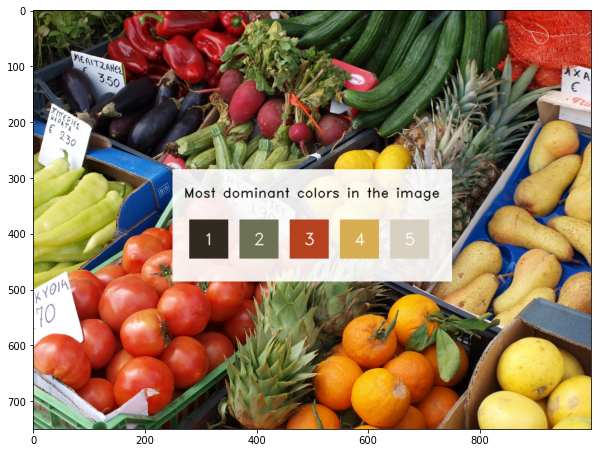

In [17]:
image = plt.imread('./output1.png')
plt.figure(figsize = (10,8))
plt.imshow(image)

#### thanks for visiting